In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def err_frac(a, b, e_a, e_b):
    """
    error de D = a/b -1 
    """
    return np.sqrt( (e_a/a)**2 + (e_b/b)**2 )*np.abs(a/b)

In [3]:
def err_frac2(a, b, e_a, e_b):
    """
    error de D = a/b -1 
    """
    return e_a/np.abs(b) + e_b/np.abs(a)

In [8]:
folder = '/home/franco/ICE/modified_gravity/profiles/'
f = {
    'lcdm_22':fits.open(folder+'Rv22-50/lcdm_z02-03_rvbig.fits'),
    'lcdm_10-15':fits.open(folder+'Rv10-15/lcdm_z02-03_rv10-15.fits'),
    'sc_22':fits.open(folder+'Rv22-50/test_rv22_ravoid_sincorr.fits'),
    # 'fR':fits.open(folder+'fR_z02-03_rv15.fits'),
}

In [54]:
p={}
for key,value in f.items():
    # print(value[1].data.Sigma.reshape(101,22))
    try:
        p[key] = {
            'Rp':value[1].data.Rp.reshape(101,22)[0],
            'S':value[1].data.Sigma.reshape(101,22)[0],
            'DSt':value[1].data.DSigma_T.reshape(101,22)[0],
            'DSx':value[1].data.DSigma_X.reshape(101,22)[0],
            'covS':value[2].data.covS.reshape(22,22),
            'covDSt':value[2].data.covDSt.reshape(22,22),
            'covDSx':value[2].data.covDSx.reshape(22,22),
        }
    except:
        print(key)
        p[key] = {
            'Rp':value[1].data.Rp.reshape(101,22)[0],
            'S':value[1].data.Sigma.reshape(101,22)[0],
            'DSt':value[1].data.DSigma_T.reshape(101,22)[0],
            'DSx':value[1].data.DSigma_X.reshape(101,22)[0],
            'covS':value[2].data.Sigma.reshape(22,22),
            'covDSt':value[2].data.DSigma_T.reshape(22,22),
            'covDSx':value[2].data.DSigma_X.reshape(22,22),
        }

lcdm_22
sc_22


In [57]:
np.sqrt(np.diag(p['lcdm_22']['covS']))

array([0.03716436, 0.02829398, 0.02410921, 0.02088218, 0.01798772,
       0.01826771, 0.01649688, 0.0139606 , 0.01515417, 0.01376701,
       0.01180483, 0.01207996, 0.01225854, 0.01136381, 0.01014061,
       0.0110141 , 0.01067738, 0.01101605, 0.01028971, 0.00975533,
       0.00973084, 0.0104554 ], dtype=float32)

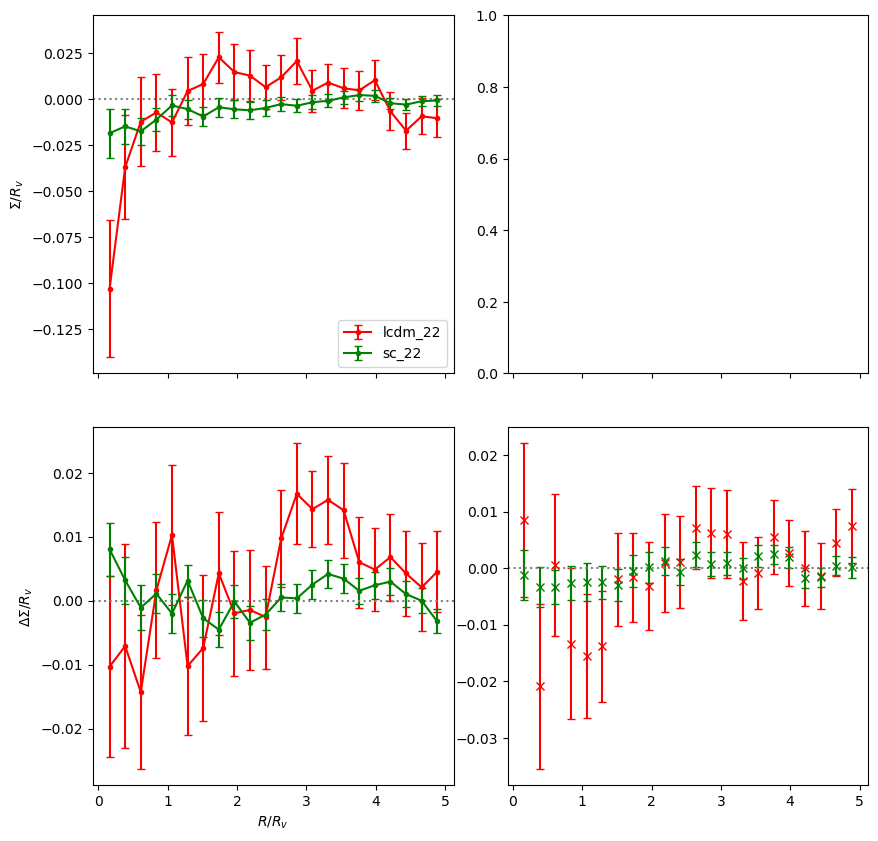

In [79]:
c = ['r','b','g']

fig, (ax1,ax2) = plt.subplots(2,2,
                             figsize=(10,10),
                             sharex=True)
ax1[0].axhline(0,ls=':',c='gray')
for i,(key,value) in enumerate(p.items()):
    if key=='lcdm_10-15':
        continue
    
    ax1[0].errorbar(value['Rp'], value['S'], np.sqrt(np.diag(value['covS'])),
                 label=key, fmt='.-', c=c[i], capsize=3)
        
    ax2[0].errorbar(value['Rp'], value['DSt'], np.sqrt(np.diag(value['covDSt'])),
                 label=key, fmt='.-', c=c[i], capsize=3)

    ax2[1].errorbar(value['Rp'], value['DSx'], np.sqrt(np.diag(value['covDSx'])),
                 label=key, fmt='x', c=c[i], capsize=3)


# ax1.errorbar(p['sc_22']['Rp'], p['sc_22']['S'], np.sqrt(np.diag(p['sc_22']['covS'])),
#              label='sc', fmt='.-b',capsize=3)

# ax1.errorbar(p['lcdm_10-15']['Rp'], p['lcdm_10-15']['S'], np.sqrt(np.diag(p['lcdm_10-15']['covS'])),
#              label='10-15', fmt='.-g',capsize=3)

ax2[0].axhline(0,ls=':',c='gray')
ax2[1].axhline(0,ls=':',c='gray')
# ax2.errorbar(p['lcdm']['Rp'], (p['sc']['S']/p['lcdm']['S']) - 1.0,
#              err_scac2(p['sc']['S'], p['lcdm']['S'], np.sqrt(np.diag(p['sc']['eS'])), np.sqrt(np.diag(p['lcdm']['eS']))),
#              fmt='.', c='k', capsize=3, label='err')
#ax2.errorbar(p['lcdm']['Rp'], (p['sc']['S']/p['lcdm']['S']) - 1.0,
#             err_scac2(p['sc']['S'], p['lcdm']['S'], np.sqrt(np.diag(p['sc']['eS'])), np.sqrt(np.diag(p['lcdm']['eS']))),
#             fmt='.', c='g', capsize=3, label='err')

#ax1.text(1.0,-0.105, '$R_v \\in [22,50)$ Mpc/h')
#ax1.text(1.0,-0.115, '$z \\in [0.2,0.3)$')
#ax1.text(1.0,-0.125, f'$N_{{lcdm}} = {f["lcdm"][0].header["NVOIDS"]-141}$')
#ax1.text(1.0,-0.135, f'$N_{{sc}} = {f["sc"][0].header["NVOIDS"]-129}$')

ax2[0].set_xlabel('$R/R_v$')
ax1[0].set_ylabel('$\\Sigma / R_v$')
ax2[0].set_ylabel('$\\Delta \\Sigma / R_v$')
ax1[0].legend()

plt.subplots_adjust(wspace=0.15, hspace=0.15)

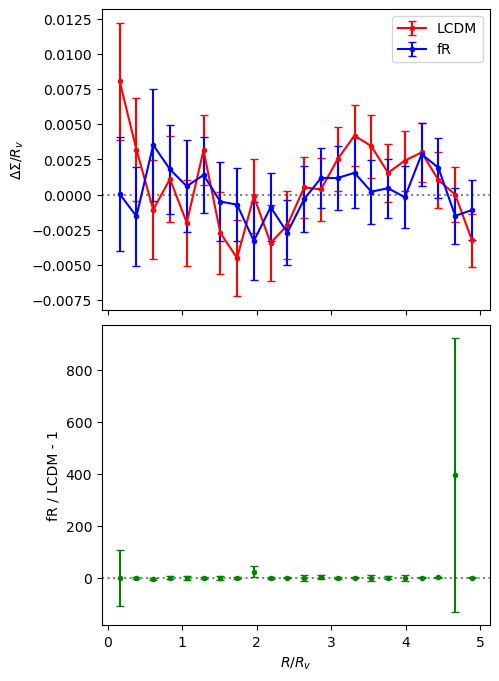

In [32]:
fig, (ax1,ax2) = plt.subplots(2,1,
                             figsize=(5,8),
                             sharex=True)
ax1.axhline(0,ls=':',c='gray')
ax1.errorbar(p['lcdm']['Rp'], p['lcdm']['DSt'], np.sqrt(np.diag(p['lcdm']['eDSt'])),
             label='LCDM', fmt='.-r',capsize=3)

ax1.errorbar(p['fR']['Rp'], p['fR']['DSt'], np.sqrt(np.diag(p['fR']['eDSt'])),
             label='fR', fmt='.-b',capsize=3)

ax2.axhline(0,ls=':',c='gray')
#ax2.errorbar(p['lcdm']['Rp'], (p['fR']['DSt']/p['lcdm']['DSt']) - 1.0,
#             err_frac(p['fR']['DSt'], p['lcdm']['DSt'], np.sqrt(np.diag(p['fR']['eDSt'])), np.sqrt(np.diag(p['lcdm']['eDSt']))),
#             fmt='.', c='k', capsize=3, label='err')
ax2.errorbar(p['lcdm']['Rp'], (p['fR']['DSt']/p['lcdm']['DSt']) - 1.0,
             err_frac2(p['fR']['DSt'], p['lcdm']['DSt'], np.sqrt(np.diag(p['fR']['eDSt'])), np.sqrt(np.diag(p['lcdm']['eDSt']))),
             fmt='.', c='g', capsize=3, label='err')

#ax1.text(1.0,-0.03, '$R_v \\in [22,50)$ Mpc/h')
#ax1.text(1.0,-0.035, '$z \\in [0.2,0.3)$')
#ax1.text(1.0,-0.125, f'$N_{{lcdm}} = {f["lcdm"][0].header["NVOIDS"]-141}$')
#ax1.text(1.0,-0.135, f'$N_{{fR}} = {f["fR"][0].header["NVOIDS"]-129}$')

ax2.set_xlabel('$R/R_v$')
ax1.set_ylabel('$ \\Delta \\Sigma / R_v$')
ax2.set_ylabel('fR / LCDM - 1')
ax1.legend()

plt.subplots_adjust(wspace=0.05, hspace=0.05)

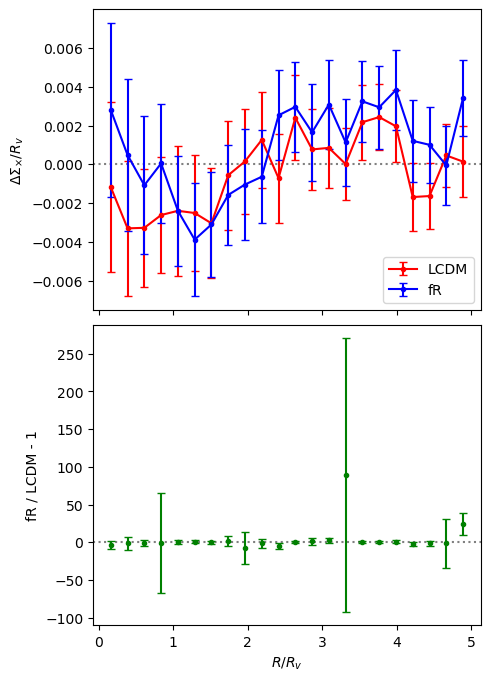

In [33]:
fig, (ax1,ax2) = plt.subplots(2,1,
                             figsize=(5,8),
                             sharex=True)
ax1.axhline(0,ls=':',c='gray')
ax1.errorbar(p['lcdm']['Rp'], p['lcdm']['DSx'], np.sqrt(np.diag(p['lcdm']['eDSx'])),
             label='LCDM', fmt='.-r',capsize=3)

ax1.errorbar(p['fR']['Rp'], p['fR']['DSx'], np.sqrt(np.diag(p['fR']['eDSx'])),
             label='fR', fmt='.-b',capsize=3)

ax2.axhline(0,ls=':',c='gray')
#ax2.errorbar(p['lcdm']['Rp'], (p['fR']['DSt']/p['lcdm']['DSt']) - 1.0,
#             err_frac(p['fR']['DSt'], p['lcdm']['DSt'], np.sqrt(np.diag(p['fR']['eDSt'])), np.sqrt(np.diag(p['lcdm']['eDSt']))),
#             fmt='.', c='k', capsize=3, label='err')
ax2.errorbar(p['lcdm']['Rp'], (p['fR']['DSx']/p['lcdm']['DSx']) - 1.0,
             err_frac2(p['fR']['DSx'], p['lcdm']['DSx'], np.sqrt(np.diag(p['fR']['eDSx'])), np.sqrt(np.diag(p['lcdm']['eDSx']))),
             fmt='.', c='g', capsize=3, label='err')

#ax1.text(1.0,-0.03, '$R_v \\in [22,50)$ Mpc/h')
#ax1.text(1.0,-0.035, '$z \\in [0.2,0.3)$')
#ax1.text(1.0,-0.125, f'$N_{{lcdm}} = {f["lcdm"][0].header["NVOIDS"]-141}$')
#ax1.text(1.0,-0.135, f'$N_{{fR}} = {f["fR"][0].header["NVOIDS"]-129}$')

ax2.set_xlabel('$R/R_v$')
ax1.set_ylabel('$ \\Delta \\Sigma_{\\times} / R_v$')
ax2.set_ylabel('fR / LCDM - 1')
ax1.legend()

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [39]:
p['lcdm']['Ninbin']/f['lcdm'][0].header['Nvoids']

array([ 12386.854,  29465.889,  46568.69 ,  63689.27 ,  80792.57 ,
        97903.336, 115004.84 , 132047.66 , 149140.36 , 166242.33 ,
       183356.4  , 200317.12 , 217212.23 , 234254.64 , 251149.7  ,
       268088.88 , 284883.2  , 301549.66 , 317822.88 , 333650.72 ,
       348445.62 , 357021.56 ], dtype=float32)

In [42]:
np.sqrt(np.diag(p['lcdm']['eS']))

array([0.0134397 , 0.00940666, 0.00747611, 0.00640773, 0.00570796,
       0.00517199, 0.00516983, 0.00527067, 0.00482225, 0.004542  ,
       0.00419401, 0.00373744, 0.00346728, 0.00382606, 0.0036322 ,
       0.00360671, 0.00325948, 0.00318316, 0.00293409, 0.00295072,
       0.00275418, 0.00307517], dtype=float32)

### extra

In [22]:
ls ../cats

GR_halo_count_z01-06_lm11-16.csv  voids_LCDM_08.dat
MG_halo_count_z01-06_lm11-15.csv  voids_LCDM_09.dat
voids_fR_08.dat                   voids_MG_Mr-20_Delta-0.8.dat
voids_fR_09.dat                   voids_MG_Mr-20_Delta-0.9.dat
voids_GR_Mr-20_Delta-0.8.dat      voids_MG_Mr-21_Delta-0.8.dat
voids_GR_Mr-20_Delta-0.9.dat      voids_MG_Mr-21_Delta-0.9.dat
voids_GR_Mr-21_Delta-0.8.dat      voids.tar.bz2
voids_GR_Mr-21_Delta-0.9.dat


In [25]:
def lenscat_load(lens_cat,
                 Rv_min, Rv_max, z_min, z_max, rho1_min, rho1_max, rho2_min, rho2_max, flag,
                 ncores:int, octant:bool, nk:int):

    ## 0:Rv, 1:ra, 2:dec, 3:z, 4:xv, 5:yv, 6:zv, 7:rho1, 8:rho2, 9:logp, 10:diff CdM y CdV, 11:flag
    ## CdM: centro de masa
    ## CdV: centro del void
    L = np.loadtxt("../cats/"+lens_cat).T

    if octant:
        # selecciono los void en un octante
        eps = 1.0
        L = L[:, (L[1] >= 0.0+eps) & (L[1] <= 90.0-eps) & (L[2]>= 0.0+eps) & (L[2] <= 90.0-eps)]

    sqrt_nk = int(np.sqrt(nk))
    NNN = len(L[0]) ##total number of voids
    ra,dec = L[1],L[2]
    K    = np.zeros((nk+1,NNN))
    K[0] = np.ones(NNN).astype(bool)

    ramin  = np.min(ra)
    cdec   = np.sin(np.deg2rad(dec))
    decmin = np.min(cdec)
    dra    = ((np.max(ra)+1.e-5) - ramin)/sqrt_nk
    ddec   = ((np.max(cdec)+1.e-5) - decmin)/sqrt_nk

    c = 1
    for a in range(sqrt_nk): 
        for d in range(sqrt_nk): 
            mra  = (ra  >= ramin + a*dra)&(ra < ramin + (a+1)*dra) 
            mdec = (cdec >= decmin + d*ddec)&(cdec < decmin + (d+1)*ddec) 
            K[c] = ~(mra&mdec)
            c += 1

    mask = (L[0] >= Rv_min) & (L[0] < Rv_max) & (L[3] >= z_min) & (L[3] < z_max) & (
            L[7] >= rho1_min) & (L[7] < rho1_max) & (L[8] >= rho2_min) & (L[8] < rho2_max) & (L[11] >= flag)

    nvoids = mask.sum()
    L = L[:,mask]
    L[1] = L[1] + np.float32(180.0) # correction to match ra with sources

    if bool(ncores-1):
        if ncores > nvoids:
            ncores = nvoids
        lbins = int(round(nvoids/float(ncores), 0))
        slices = ((np.arange(lbins)+1)*ncores).astype(int)
        slices = slices[(slices < nvoids)]
        L = np.split(L.T, slices)
        K = np.split(K.T, slices)

    return L, K, nvoids

In [67]:
L,_,nvoids = lenscat_load('voids_LCDM_09.dat', 1.0, 100.0, 0.0, 1.0, -1.0, 0.0, -1.0, 100.0, 2, 1, False, 100)

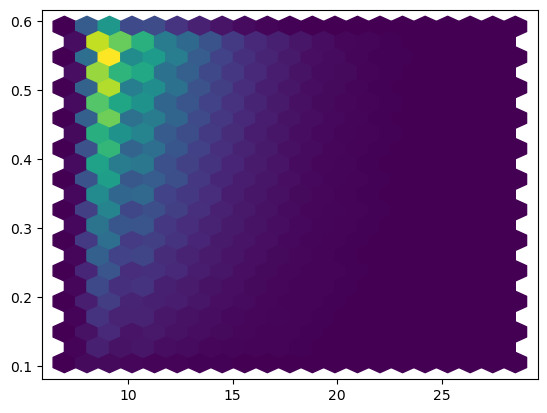

In [69]:
plt.hexbin(L[0],L[3],gridsize=20)

In [13]:
a = 'l768_gr_z04-07_for02-03_19304.fits'

## testing `funcs` vs `maria_func`

In [43]:
import sys
sys.path.append('/home/franco/FAMAF/Lensing/codes_tesis/')
import maria_func
sys.path.append('/home/franco/ICE/modified_gravity/lensing/')
import funcs

261.2180229058746 78.2597310440606


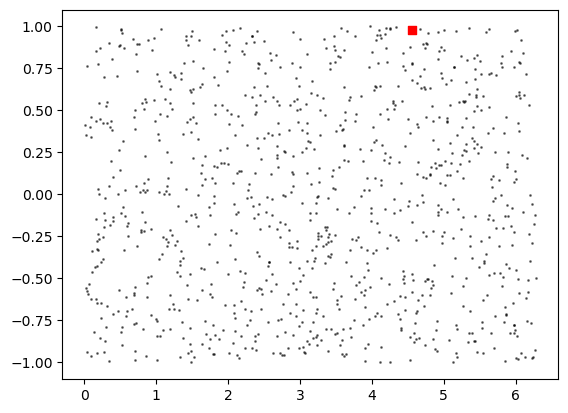

In [277]:
ra_gal = np.random.uniform(0.0,np.pi*2.0, 1000)
dec_gal = np.arcsin(np.random.uniform(-1.0,1.0, 1000))

RA0, DEC0 = np.random.rand()*2.0*np.pi, np.arcsin(np.random.uniform(-1.0,1.0,1)[0])
print(np.rad2deg(RA0), np.rad2deg(DEC0))

plt.scatter(ra_gal, np.sin(dec_gal), alpha=0.5, c='k', s=1)
plt.scatter(RA0, np.sin(DEC0), c='r', marker='s')
plt.show()

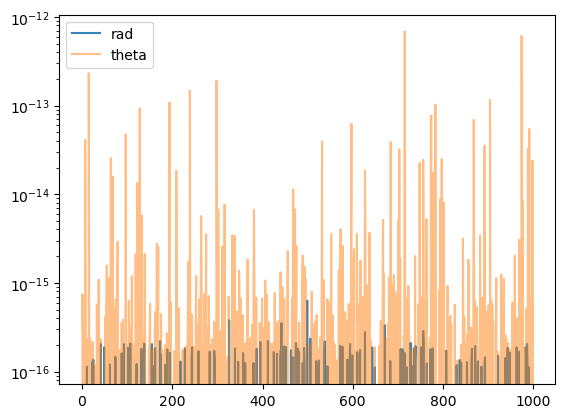

In [278]:
maria = maria_func.eq2p2(ra_gal, dec_gal, RA0, DEC0)

mio = funcs.eq2p2(ra_gal, dec_gal, RA0,DEC0)

plt.plot((maria[0] - mio[0])/np.abs(maria[0]), label='rad',alpha=0.9)
plt.plot((maria[1] - mio[1])/np.abs(maria[1]),label='theta',alpha=0.5)
plt.semilogy()
plt.legend()
plt.show()